# Visualisasi OQ004

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## 1. Import packages

In [1]:
from custom_maps import *

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Patahan

In [2]:
# membuka data pkl
area_fault_geoms = open_pkl('tmp_OQ004_area_faults_geoms.pkl')
dict_faults = open_pkl('dict_faults.pkl')

# simpan area faults ke dalam shp
geoms_to_shp(area_fault_geoms, dict_faults=dict_faults, type_of="area fault")

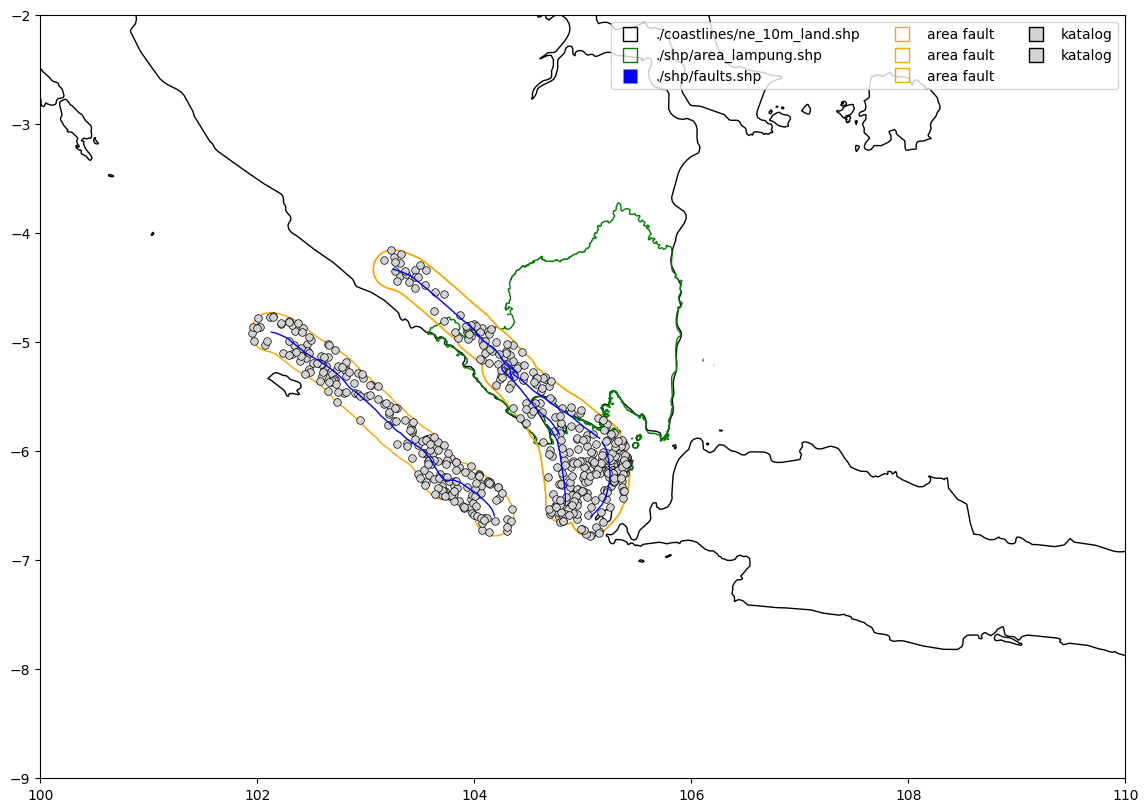

In [3]:
list_shp_area_faults = list_filenames("./shp_output/area_fault_*/*.shp")
banyak_data = len(list_shp_area_faults)

list_shp_geometry = (
    './coastlines/ne_10m_land.shp',
    './shp/area_lampung.shp',
    './shp/faults.shp',
    *list_shp_area_faults,
)

list_color_shp_geometry = (
    ['none', 'black'],
    ['none', 'green'],
    ['blue', 'none'],
    *duplicate_var(['none', 'orange'], banyak_data),
)

list_label_shp_geometry = (
    './coastlines/ne_10m_land.shp',
    './shp/area_lampung.shp',
    './shp/faults.shp',
    *duplicate_var("area fault", banyak_data),
)

list_pkl_catalogue_faults = list_filenames("dict_catalogue_fault_*.pkl")
banyak_data = len(list_pkl_catalogue_faults)

list_catalogue = (
    *list_pkl_catalogue_faults,
)

list_color_catalogue = (
    *duplicate_var(['lightgrey', 'black'], banyak_data),
)

list_label_catalogue = (
    *duplicate_var("katalog", banyak_data),
)

map_limit = (
    (-9, -2),
    (100, 110)
)

figsize = (14,14)

fig, _ = quick_create_map(list_shp_geometry, list_color_shp_geometry, list_label_shp_geometry,
                    list_catalogue, list_color_catalogue, list_label_catalogue, map_limit, figsize=figsize,
                         markersize=30)

# menyimpan
fig.savefig(os.path.join(dir_figs, 'area_faults.png'), dpi=300)

## 4. Megathrust

/Users/yudhastyawan/Documents/projects/openquake/Seismologi-Teknik-OQ/custom_maps.py:145: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(dict_catalogue['longitude'],


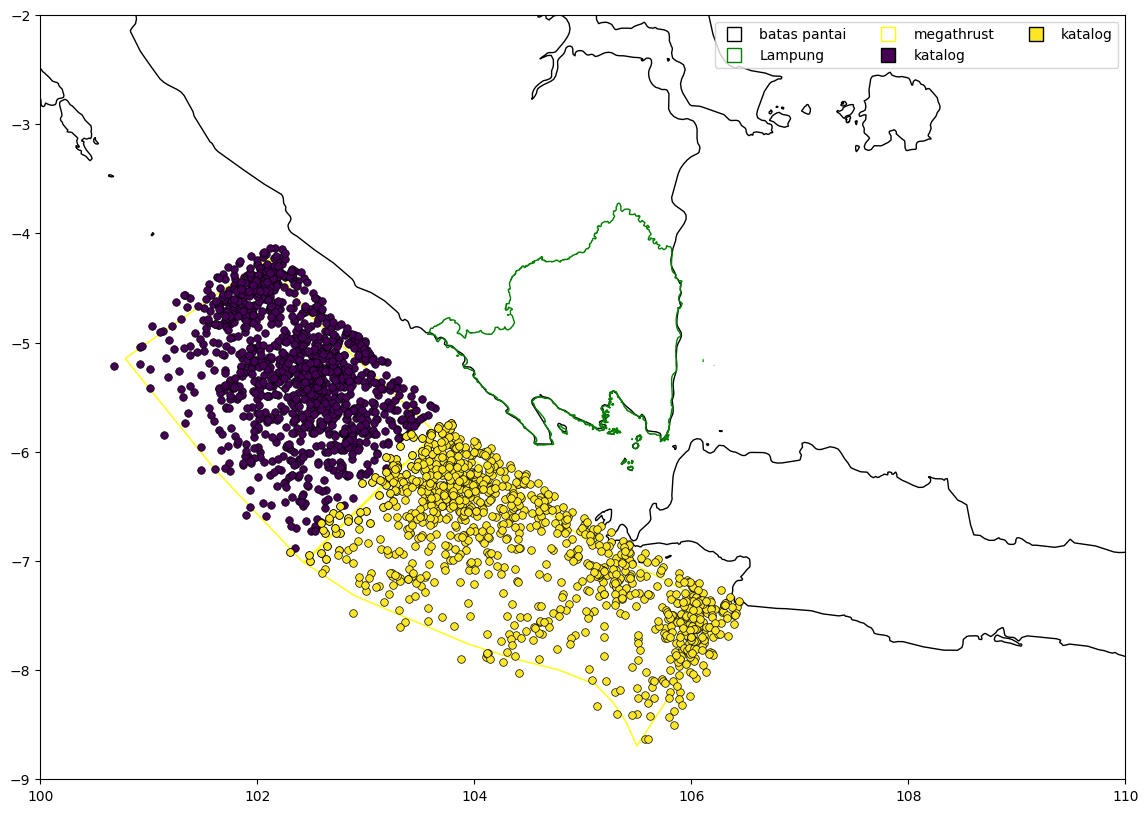

In [4]:
list_shp_geometry = (
    './coastlines/ne_10m_land.shp',
    './shp/area_lampung.shp',
    './shp/megathrusts.shp',
)

list_color_shp_geometry = (
    ['none', 'black'],
    ['none', 'green'],
    ['none', 'yellow'],
)

list_label_shp_geometry = (
    'batas pantai',
    'Lampung',
    'megathrust',
)

list_pkl_catalogue_megathrusts = list_filenames("dict_catalogue_megathrust_*.pkl")
banyak_data = len(list_pkl_catalogue_megathrusts)

list_catalogue = (
    *list_pkl_catalogue_megathrusts,
)

list_color_catalogue = (
    *random_colors(edge='black', n=banyak_data, name='viridis'),
)

list_label_catalogue = (
    *duplicate_var("katalog", banyak_data),
)

map_limit = (
    (-9, -2),
    (100, 110)
)

figsize = (14,14)

fig, _ = quick_create_map(list_shp_geometry, list_color_shp_geometry, list_label_shp_geometry,
                    list_catalogue, list_color_catalogue, list_label_catalogue, map_limit, figsize=figsize,
                         markersize=30)

# menyimpan
fig.savefig(os.path.join(dir_figs, 'area_megathrusts.png'), dpi=300)

## 4. Shallow background

/Users/yudhastyawan/Documents/projects/openquake/Seismologi-Teknik-OQ/custom_maps.py:145: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(dict_catalogue['longitude'],


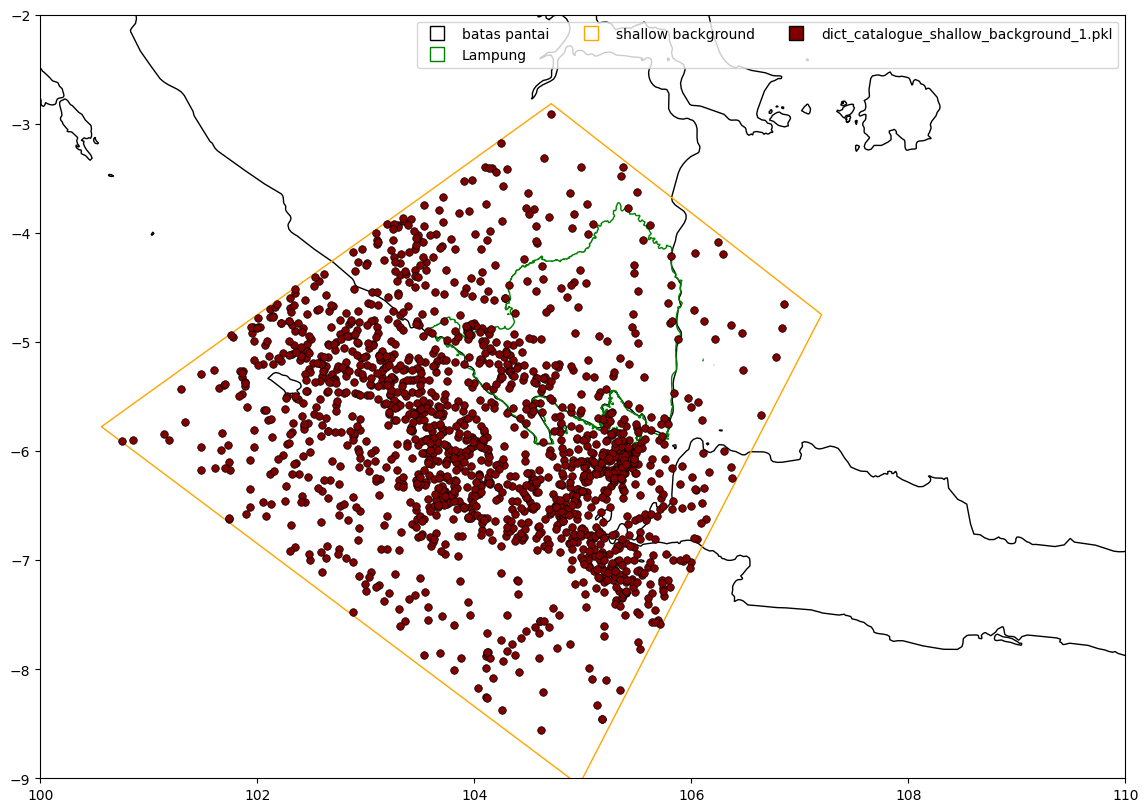

In [5]:
list_shp_geometry = (
    './coastlines/ne_10m_land.shp',
    './shp/area_lampung.shp',
    './shp/shallow_background.shp',
)

list_color_shp_geometry = (
    ['none', 'black'],
    ['none', 'green'],
    ['none', 'orange'],
)

list_label_shp_geometry = (
    'batas pantai',
    'Lampung',
    'shallow background',
)

list_pkl_catalogue_backgrounds = list_filenames("dict_catalogue_shallow_background_*.pkl")
banyak_data = len(list_pkl_catalogue_backgrounds)

list_catalogue = (
    *list_pkl_catalogue_backgrounds,
)

list_color_catalogue = (
    *random_colors(edge='black', n=banyak_data),
)

list_label_catalogue = (
    *list_pkl_catalogue_backgrounds,
)

map_limit = (
    (-9, -2),
    (100, 110)
)

figsize = (14,14)

fig, _ = quick_create_map(list_shp_geometry, list_color_shp_geometry, list_label_shp_geometry,
                    list_catalogue, list_color_catalogue, list_label_catalogue, map_limit, figsize=figsize,
                         markersize=30)

# menyimpan
fig.savefig(os.path.join(dir_figs, 'area_shallow_background.png'), dpi=300)

## 5. Deep background

/Users/yudhastyawan/Documents/projects/openquake/Seismologi-Teknik-OQ/custom_maps.py:145: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(dict_catalogue['longitude'],


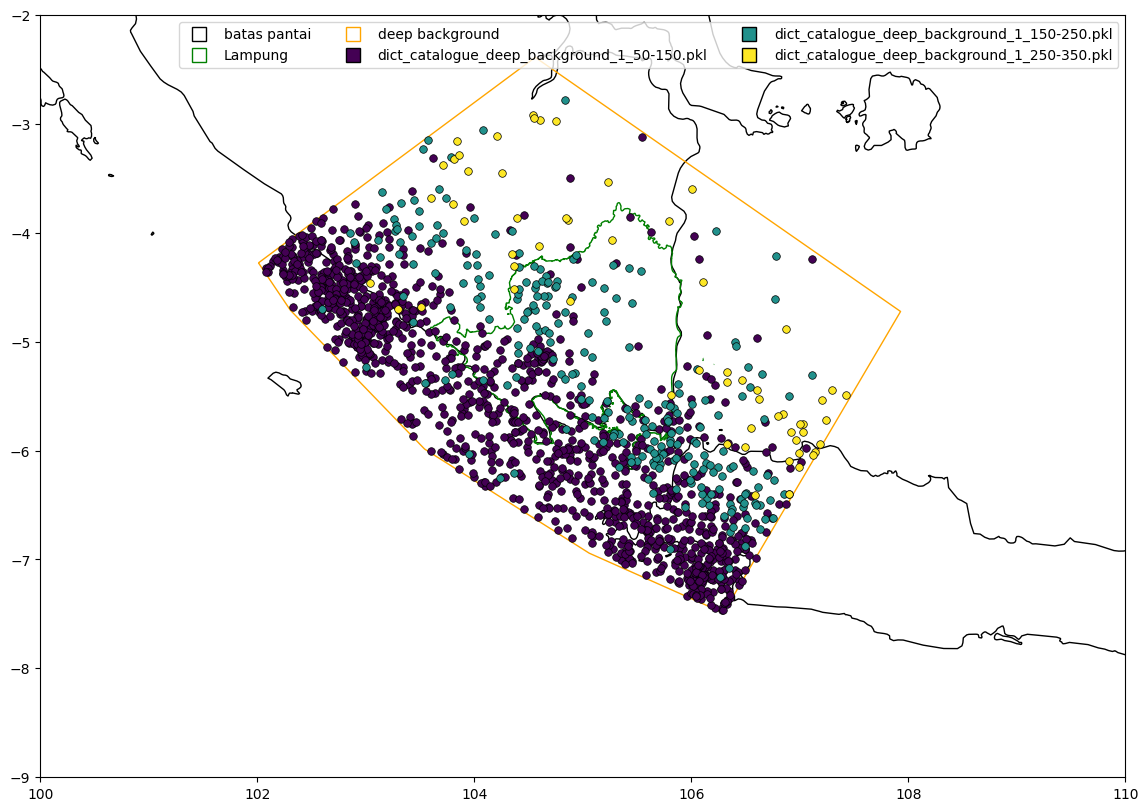

In [6]:
list_shp_geometry = (
    './coastlines/ne_10m_land.shp',
    './shp/area_lampung.shp',
    './shp/deep_background.shp',
)

list_color_shp_geometry = (
    ['none', 'black'],
    ['none', 'green'],
    ['none', 'orange'],
)

list_label_shp_geometry = (
    'batas pantai',
    'Lampung',
    'deep background',
)

list_pkl_catalogue_backgrounds = list_filenames("dict_catalogue_deep_background_*.pkl")
banyak_data = len(list_pkl_catalogue_backgrounds)

list_catalogue = (
    *list_pkl_catalogue_backgrounds,
)

list_color_catalogue = (
    *random_colors(edge='black', n=banyak_data, name='viridis'),
)

list_label_catalogue = (
    *list_pkl_catalogue_backgrounds,
)

map_limit = (
    (-9, -2),
    (100, 110)
)

figsize = (14,14)

fig, _ = quick_create_map(list_shp_geometry, list_color_shp_geometry, list_label_shp_geometry,
                    list_catalogue, list_color_catalogue, list_label_catalogue, map_limit, figsize=figsize,
                         markersize=30)

# menyimpan
fig.savefig(os.path.join(dir_figs, 'area_deep_background.png'), dpi=300)